In [1]:
# fazer imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

from classes.DataHandler.data import DataHandler
from classes.modelos.perceptron import NeuronPeceptron
from classes.modelos.adaline import NeuronADALINE
from classes.rounds import RoundsPerceptron

# Obtém o diretório atual do notebook
current_directory = os.getcwd()
# Adiciona o caminho relativo para o arquivo 'spiral.csv'
path = os.path.join(current_directory, "dados", "spiral.csv")
print(path)

c:\Users\henri\Documents\pythonProjcs\cadeira_IA_cirilo\av3\trabalho\dados\spiral.csv


In [ ]:
dh = DataHandler(path)

In [ ]:
# separar entre componentes e rótulo
componentes, rotulos = DataHandler.SepXY(dh)


print(componentes)
print(rotulos)

[[ 15.40724  -3.66801]
 [ 15.07298  -1.56346]
 [-15.43986   0.16502]
 ...
 [ -6.41697   5.92464]
 [  5.00793  -5.7493 ]
 [  6.96596  -6.47686]]
[ 1.  1. -1. ...  1. -1. -1.]


In [ ]:
# separar conjunto de componentes pelo seu respectivo rotulo
data_1 = componentes[rotulos == 1, :]
data_2 = componentes[rotulos == -1, :]

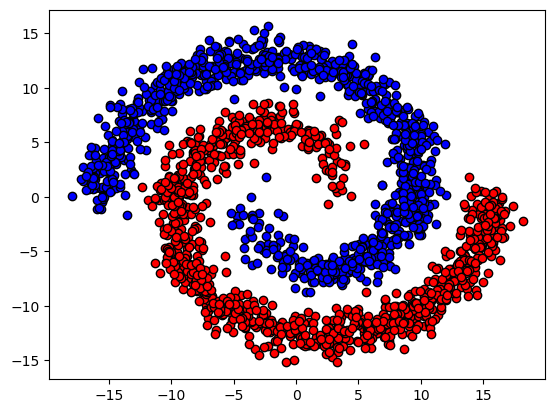

In [ ]:
plt.scatter(data_1[:,0], data_1[:,1], color = "r", edgecolors="k")
plt.scatter(data_2[:,0], data_2[:,1], color = "blue", edgecolors="k")
plt.show()

## Perceptron

In [ ]:
# Fazer as 500 rodas de treino do perceptron e coletar as amostras

# dfinir DataHandler
dh = DataHandler(path)
# criar lista de perceptrons para serem treinados
# deve passar p (componentes) e n (passo de treiamento)
n = 0.1
list_perceptrons = [NeuronPeceptron(dh.colls - 1, n) for _ in range(5)]

# Definir classe responsável por realizar os treinos
rounds = RoundsPerceptron(dh)

In [ ]:
resultados = rounds.run_rounds(list_perceptrons)

In [ ]:
dh = DataHandler(path)
resultados = []
for perceptron in [NeuronPeceptron(2, 0.1) for _ in range(5)]:
    treino, teste = dh.MonteCarlo()
    treino_x, treino_y = DataHandler.SepXY(treino)
    teste_x, teste_y = DataHandler.SepXY(teste)
    
    treino_x = np.concatenate((treino_x, np.full((treino_x.shape[0], 1), -1)), axis=1)
    teste_x = np.concatenate((teste_x, np.full((teste_x.shape[0], 1), -1)), axis=1)

    perceptron.train(treino_x, treino_y)
    resultados.append(teste_y - np.apply_along_axis(perceptron.SteepOut, 1, teste_x))


In [ ]:
acuracia = np.mean(list(map(lambda x: len(x[x==0])/len(x), resultados)))

In [ ]:
print(acuracia)

0.337


In [ ]:
dh = DataHandler(path)
resultados = []
for perceptron in [NeuronADALINE(2, 0.01, 0.0003) for _ in range(5)]:
    treino, teste = dh.MonteCarlo()
    treino_x, treino_y = DataHandler.SepXY(treino)
    teste_x, teste_y = DataHandler.SepXY(teste)
    
    treino_x = dh.nomrData(treino_x)
    teste_x = dh.nomrData(teste_x)

    treino_x = np.concatenate((treino_x, np.full((treino_x.shape[0], 1), -1)), axis=1)
    teste_x = np.concatenate((teste_x, np.full((teste_x.shape[0], 1), -1)), axis=1)

    perceptron.train(treino_x, treino_y)
    resultados.append(teste_y - np.apply_along_axis(perceptron.SteepOut, 1, teste_x))


In [10]:
print(resultados)

[array([-0.75715428, -0.03311196, -0.75344164, -0.18341087, -0.72765998,
       -0.23766227,  0.34130997,  0.27172782, -0.20119967, -1.41237167,
       -1.4061453 , -0.86890428, -0.40780733, -1.36486854, -0.46301416,
       -0.22718248, -0.3915094 , -0.67199563, -0.00621938, -0.21326363,
        0.34576613, -0.19206253, -1.24927173, -1.12600014, -0.99982282,
       -0.32106348, -0.10207007, -0.99744931, -0.48280957, -0.50785118,
       -1.1646931 ,  0.38012582, -0.67035026, -0.62900329, -0.44016097,
       -0.23322653, -0.88104499, -0.15032762,  0.41318343, -1.33870148,
       -0.56051172, -0.58855556, -0.67131918, -0.12311237, -1.39602081,
       -0.53511   ,  0.40313838, -0.76150087, -0.34087913, -0.92312605,
       -0.43809831, -0.03219945, -0.66294257,  0.12548477, -1.3255159 ,
       -0.91764006, -0.73550601,  0.37375959, -0.407899  , -0.44957726,
       -0.69100605, -0.86504669, -1.39077621, -0.41741397, -0.1143719 ,
       -0.09200898, -0.27082036,  0.19944759,  0.23385737, -0.8

In [2]:
dh = DataHandler(path)
treino, teste = dh.MonteCarlo()
treino_x, treino_y = DataHandler.SepXY(treino)
teste_x, teste_y = DataHandler.SepXY(teste)

treino_x = np.concatenate((treino_x, np.full((treino_x.shape[0], 1), -1)), axis=1)
teste_x = np.concatenate((teste_x, np.full((teste_x.shape[0], 1), -1)), axis=1)

In [4]:
adaline = NeuronADALINE(2, 0.01, 0.02)
print(adaline.w)
adaline.train(treino_x, treino_y)
print(adaline.w)

[0.09114563 0.10532629 0.27776294]
[-9.99923559e-01 -9.99918429e-01 -5.95487168e-06]


In [3]:
print(treino_x[0, :])

[ 1.40902285 -0.80934922 -1.        ]
